In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split


In [3]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
dataset=pd.read_csv('Dataset.csv')
dataset

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
1,4.0,43.0,round,circumscribed,NaN,1
2,5.0,58.0,irregular,spiculated,low,1
3,4.0,28.0,round,circumscribed,low,0
4,5.0,74.0,round,spiculated,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,oval,circumscribed,low,0
957,4.0,56.0,irregular,spiculated,low,1
958,4.0,64.0,irregular,spiculated,low,0
959,5.0,66.0,irregular,spiculated,low,1


                     BI_RADS        Age
Shape     Severity                     
irregular 0         4.166667  56.635135
          1         4.898413  63.489362
lobular   0         4.100000  51.444444
          1         4.711111  68.142857
oval      0         3.943182  48.212903
          1         4.457143  58.838710
round     0         3.913978  46.160714
          1         4.421053  61.742857


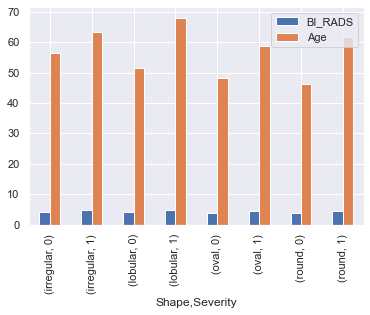

In [7]:
mass_density_group=dataset.groupby(["Shape","Severity"]).mean()
print(mass_density_group)
mass_density_group.plot.bar()

            BI_RADS        Age  Severity
Shape                                   
irregular  4.744361  62.064607  0.787500
lobular    4.389474  59.505747  0.473684
oval       4.028436  49.983871  0.165877
round      4.000000  48.847291  0.169643


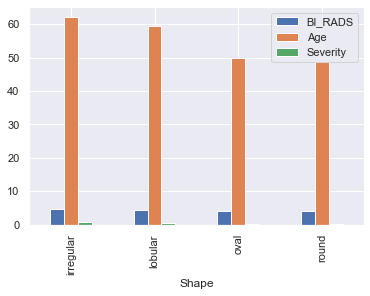

In [8]:
mass_density_group=dataset.groupby(["Shape"]).
print(mass_density_group)
mass_density_group.plot.bar()

In [6]:
print(dataset['Mass_Density'].unique())
print(dataset['Shape'].unique())
print(dataset['Margin'].unique())

['low' nan 'high' 'iso' 'fat-containing']
['lobular' 'round' 'irregular' nan 'oval']
['spiculated' 'circumscribed' nan 'ill-defined' 'obscured'
 'microlobulated']


           BI_RADS  Age  Margin  Mass_Density  Severity
Shape                                                  
irregular      429  385     431           431       431
lobular         95   87      95            95        95
oval           211  186     211           211       211
round          224  203     224           224       224
                BI_RADS  Age  Shape  Mass_Density  Severity
Margin                                                     
circumscribed       404  360    405           405       405
ill-defined         279  252    280           280       280
microlobulated       24   22     24            24        24
obscured            116  105    116           116       116
spiculated          136  122    136           136       136


<AxesSubplot:xlabel='Margin'>

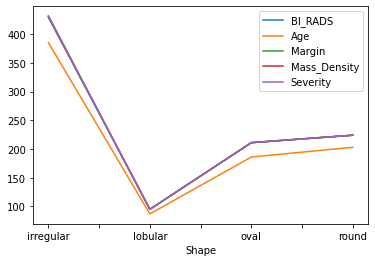

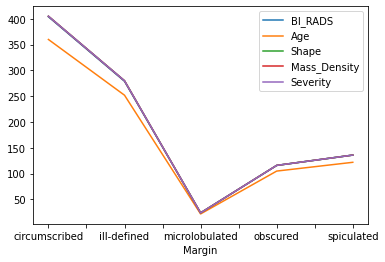

In [83]:
print(dataset.groupby("Shape").count())
shape_count=dataset.groupby("Shape").count()
shape_count.plot()

print(dataset.groupby("Margin").count())
    margin_count=dataset.groupby("Margin").count()
margin_count.plot()

In [122]:
##label encoder looses data priority 
dataset["Mass_Density"]=dataset["Mass_Density"].fillna('medium')
dataset["Shape"]=dataset["Shape"].fillna('irregular')
dataset["Margin"]=dataset["Margin"].fillna('circumscribed')
print(dataset)

     BI_RADS   Age      Shape         Margin Mass_Density  Severity
0        5.0  67.0    lobular     spiculated          low         1
1        4.0  43.0      round  circumscribed       medium         1
2        5.0  58.0  irregular     spiculated          low         1
3        4.0  28.0      round  circumscribed          low         0
4        5.0  74.0      round     spiculated       medium         1
..       ...   ...        ...            ...          ...       ...
956      4.0  47.0       oval  circumscribed          low         0
957      4.0  56.0  irregular     spiculated          low         1
958      4.0  64.0  irregular     spiculated          low         0
959      5.0  66.0  irregular     spiculated          low         1
960      4.0  62.0    lobular       obscured          low         0

[961 rows x 6 columns]


In [98]:
dataset=dataset.fillna(0)
clean_dataset=pd.get_dummies(dataset,columns=['Margin','Mass_Density','Shape'])
clean_dataset


,BI_RADS,Age,Severity,Margin_circumscribed,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_fat-containing,Mass_Density_high,Mass_Density_iso,Mass_Density_low,Mass_Density_medium,Shape_irregular,Shape_lobular,Shape_oval,Shape_round
0,5.0,67.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,4.0,43.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,5.0,58.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,4.0,28.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5.0,74.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,4.0,47.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
957,4.0,56.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
958,4.0,64.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
959,5.0,66.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [99]:
X=clean_dataset
y=clean_dataset.pop('Severity')

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [111]:
model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Depth of the Decision Tree : 20
Target on train data [0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 

In [113]:
from sklearn.svm import SVC

In [114]:
model = SVC()

# fit the model with the training data
model.fit(X_train,y_train)

SVC()

In [115]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0
 1 0

In [135]:
model = GaussianNB()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)


In [130]:
predicted = model.predict(X_test)
metrics.confusion_matrix(predicted, y_test)


array([[138,  31],
       [ 37, 112]], dtype=int64)

In [131]:
model_score = model.score(X_test, y_test)
model_score

0.7861635220125787

In [132]:
y_predictProb = model.predict_proba(X_test)
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8391808191808192

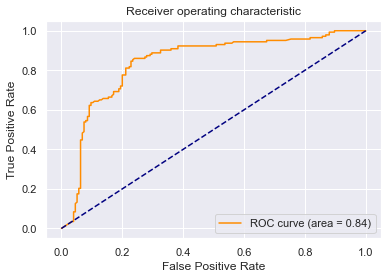

In [133]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
